# 에어비앤비 크롤링

In [109]:
import requests
from bs4 import BeautifulSoup as bs
import urllib
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
# 맷플롯립 한글 폰트 지정
import platform
from matplotlib import font_manager, rc

# 한글 설정시 마이너스 부호 깨지는 것 방지
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    # mac
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    # windows
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [2]:
url="https://www.airbnb.co.kr/s/%EC%A0%9C%EC%A3%BC%EB%8F%84/homes?query=%EC%A0%9C%EC%A3%BC%EB%8F%84&federated_search_session_id=e296e38b-6ec1-4296-9a81-f762cfb2c92a&source=structured_search_input_header&search_type=pagination&tab_id=home_tab&checkin=2020-08-16&refinement_paths%5B%5D=%2Fhomes&checkout=2020-08-17&place_id=ChIJRUDITFTjDDURMb8emNI2vGY&section_offset=2&items_offset=0"
url_parsed=urllib.parse.urlparse(url)

url_qs=urllib.parse.parse_qs(url_parsed.query)

In [3]:
url_qs

{'query': ['제주도'],
 'federated_search_session_id': ['e296e38b-6ec1-4296-9a81-f762cfb2c92a'],
 'source': ['structured_search_input_header'],
 'search_type': ['pagination'],
 'tab_id': ['home_tab'],
 'checkin': ['2020-08-16'],
 'refinement_paths[]': ['/homes'],
 'checkout': ['2020-08-17'],
 'place_id': ['ChIJRUDITFTjDDURMb8emNI2vGY'],
 'section_offset': ['2'],
 'items_offset': ['0']}

In [4]:
base_url="https://www.airbnb.co.kr/s/%EC%A0%9C%EC%A3%BC%EB%8F%84/homes"
params={'query': '제주도',
 'federated_search_session_id': 'e296e38b-6ec1-4296-9a81-f762cfb2c92a',
 'source': 'structured_search_input_header',
 'search_type': 'pagination',
 'tab_id': 'home_tab',
 'checkin': '2020-08-16',
 'refinement_paths[]': '/homes',
 'checkout': '2020-08-17',
 'place_id': 'ChIJRUDITFTjDDURMb8emNI2vGY',
 'section_offset': '2',
 'items_offset': '0'}

In [5]:
resp=requests.get(base_url,params=params)
resp

soup=bs(resp.text)

item_tags=soup.select("#FMP-target > div > div > div > div")
len(item_tags[0])

<Response [200]>

In [8]:
a_tags=item_tags[0].find_all("a")

url_list=[]
for i in a_tags:
    url_list.append("https://www.airbnb.co.kr%s" %i.get("href"))
    
url_list


['https://www.airbnb.co.kr/rooms/19724369?location=%EC%A0%9C%EC%A3%BC%EB%8F%84&check_in=2020-08-16&check_out=2020-08-17&previous_page_section_name=1000&federated_search_id=d8ab127c-7d64-4fce-a573-0fdc5452e4c9',
 'https://www.airbnb.co.kr/rooms/36090662?location=%EC%A0%9C%EC%A3%BC%EB%8F%84&check_in=2020-08-16&check_out=2020-08-17&previous_page_section_name=1000&federated_search_id=d8ab127c-7d64-4fce-a573-0fdc5452e4c9',
 'https://www.airbnb.co.kr/rooms/15321610?location=%EC%A0%9C%EC%A3%BC%EB%8F%84&check_in=2020-08-16&check_out=2020-08-17&previous_page_section_name=1000&federated_search_id=d8ab127c-7d64-4fce-a573-0fdc5452e4c9',
 'https://www.airbnb.co.kr/rooms/18103390?location=%EC%A0%9C%EC%A3%BC%EB%8F%84&check_in=2020-08-16&check_out=2020-08-17&previous_page_section_name=1000&federated_search_id=d8ab127c-7d64-4fce-a573-0fdc5452e4c9',
 'https://www.airbnb.co.kr/rooms/43298030?location=%EC%A0%9C%EC%A3%BC%EB%8F%84&check_in=2020-08-16&check_out=2020-08-17&previous_page_section_name=1000&fede

In [9]:
price_tags=item_tags[0].find_all("span", class_="_1p7iugi")

price_list=[]

for i in price_tags:
    try:
        price=i.text.split(":")[2]
    except:
        price=i.text.split(":")[1]
        
    price_list.append(price)
    
price_list
                  

['₩44,100',
 '₩51,988',
 '₩34,543',
 '₩35,814',
 '₩34,659',
 '₩80,870',
 '₩67,654',
 '₩103,977',
 '₩57,765',
 '₩46,212',
 '₩34,659',
 '₩34,659',
 '₩144,412',
 '₩83,181',
 '₩43,900',
 '₩92,423',
 '₩288,823',
 '₩19,640',
 '₩39,280',
 '₩25,417']

In [10]:
count_reviews=item_tags[0].find_all("span",class_="_krjbj")

count_reviews

count_reviews_list=[]
for i in count_reviews:
    if "후기" in str(i):
        count_reviews_list.append(i.text.split(" ")[1])
        
count_reviews_list

['702개',
 '36개',
 '63개',
 '70개',
 '10개',
 '64개',
 '44개',
 '317개',
 '8개',
 '15개',
 '54개',
 '188개',
 '96개',
 '156개',
 '7개',
 '121개',
 '57개',
 '14개']

In [11]:
name_tags=item_tags[0].find_all("div",class_="_1c2n35az")
rate_tags=item_tags[0].find_all("span",class_="_10fy1f8")


result=[]
for n,r,u,p,c in zip(name_tags,rate_tags,url_list,price_list,count_reviews_list):
    result.append({
        "이름":n.text,
        "평점":r.text,
        "후기 개수" :c,
        "가격":p,
        "링크":u
    })
    
result

[{'이름': '[플레이스캠프제주] Standard',
  '평점': '4.47',
  '후기 개수': '702개',
  '가격': '₩44,100',
  '링크': 'https://www.airbnb.co.kr/rooms/19724369?location=%EC%A0%9C%EC%A3%BC%EB%8F%84&check_in=2020-08-16&check_out=2020-08-17&previous_page_section_name=1000&federated_search_id=d8ab127c-7d64-4fce-a573-0fdc5452e4c9'},
 {'이름': '법환동 바닷가집 별채',
  '평점': '4.86',
  '후기 개수': '36개',
  '가격': '₩51,988',
  '링크': 'https://www.airbnb.co.kr/rooms/36090662?location=%EC%A0%9C%EC%A3%BC%EB%8F%84&check_in=2020-08-16&check_out=2020-08-17&previous_page_section_name=1000&federated_search_id=d8ab127c-7d64-4fce-a573-0fdc5452e4c9'},
 {'이름': '몽돌하우스',
  '평점': '4.84',
  '후기 개수': '63개',
  '가격': '₩34,543',
  '링크': 'https://www.airbnb.co.kr/rooms/15321610?location=%EC%A0%9C%EC%A3%BC%EB%8F%84&check_in=2020-08-16&check_out=2020-08-17&previous_page_section_name=1000&federated_search_id=d8ab127c-7d64-4fce-a573-0fdc5452e4c9'},
 {'이름': '걷기 좋은 동네 게스트하우스',
  '평점': '4.61',
  '후기 개수': '70개',
  '가격': '₩35,814',
  '링크': 'https://www.airbnb.co.k

In [207]:
aa_parsed=urllib.parse.urlparse("https://www.airbnb.co.kr/s/%EC%A0%9C%EC%A3%BC%EB%8F%84/homes?tab_id=home_tab&checkin=2020-08-16&refinement_paths%5B%5D=%2Fhomes&source=structured_search_input_header&checkout=2020-08-17&search_type=pagination&federated_search_session_id=84129821-dfaf-4829-8d0e-55b87780b004&query=%EC%A0%9C%EC%A3%BC%EB%8F%84&place_id=ChIJRUDITFTjDDURMb8emNI2vGY&section_offset=3&items_offset=20")

In [208]:
aa_query=urllib.parse.parse_qs(aa_parsed.query)
aa_query

{'tab_id': ['home_tab'],
 'checkin': ['2020-08-16'],
 'refinement_paths[]': ['/homes'],
 'source': ['structured_search_input_header'],
 'checkout': ['2020-08-17'],
 'search_type': ['pagination'],
 'federated_search_session_id': ['84129821-dfaf-4829-8d0e-55b87780b004'],
 'query': ['제주도'],
 'place_id': ['ChIJRUDITFTjDDURMb8emNI2vGY'],
 'section_offset': ['3'],
 'items_offset': ['20']}

# 에어비앤비 크롤링 함수화

In [210]:
def airbnb(place,checkin,checkout,pages):  #place = 장소, checkin = 체크인 날짜, checkout :체크아웃 날짜, pages=검색하고자 하는 페이지 수
    
    
    result_list=[]  #크롤링 최종 결과를 담을 리스트
    
    #에어비앤비는 offset이 20단위로 페이지가 변화 ex)offset 0 : 1페이지 , offset 1~20: 2페이지 
    for page in range(1,pages+1): #입력받은 페이지 수만큼 모두 크롤링 하기 위해
        if page==1:  #page가 1이면 offset=0
            offset=0
        else:
            offset=page*20  #1보다 크면 page*20
    
    
        #리퀘스트할 url과 파라미터 설정
        base_url="https://www.airbnb.co.kr/s/%s/homes" %place
        params={
         'source': 'structured_search_input_header',
         'search_type': 'pagination',
         'tab_id': 'home_tab',
         'checkin': checkin,
         'refinement_paths[]': '/homes',
         'checkout': checkout,
         'section_offset': '2',
         'items_offset': offset}
        
        resp=requests.get(base_url,params=params)
        soup=bs(resp.text)
        item_tags=soup.select("#FMP-target > div > div > div > div")
        len(item_tags[0])

        
        #해당 숙소에 대한 상세페이지 url을 가져옴
        a_tags=item_tags[0].find_all("a")
        url_list=[]
        for i in a_tags:
            url_list.append("https://www.airbnb.co.kr%s" %i.get("href"))


        #숙소들의 가격정보를 가져옴
        price_tags=item_tags[0].find_all("span", class_="_1p7iugi")
        price_list=[]
        for i in price_tags:
            try:
                price=i.text.split(":")[2]
            except:
                price=i.text.split(":")[1]

            price_list.append(price.replace("₩",""))

        #숙소들의 리뷰 개수를 가져옴
        count_reviews=item_tags[0].find_all("span",class_="_krjbj")
        count_reviews
        count_reviews_list=[]
        for i in count_reviews:
            if "후기" in str(i):
                count_reviews_list.append(i.text.split(" ")[1])

        #숙소들의 이름과 평점을 가져옴
        name_tags=item_tags[0].find_all("div",class_="_1c2n35az")
        rate_tags=item_tags[0].find_all("span",class_="_10fy1f8")
        
        result=[]
        
        #앞에서 추출한 정보들을 딕셔너리화 하여 result 리스트에 추가
        for n,r,u,p,c in zip(name_tags,rate_tags,url_list,price_list,count_reviews_list):
            result.append({
                "이름":n.text,
                "평점":r.text,
                "후기 개수" :c,
                "가격":p,
                "링크":u
            })
        for item in result:
            if item["이름"] not in result_list:
                result_list.append(item)

                
                
    #최저 가격 숙소 / 최고 평점 숙소 구하기            
    min_price=1000000
    name_of_min_price=""
    min_url=""
    
    highest_rate=0.00
    name_of_hr=""
    highest_url=""
    
    for item in result_list:
        price=item["가격"]
        price=price.replace("₩","")
        price=int(price.replace(",",""))

        if price<min_price:
            min_price=price
            name_of_min_price=item["이름"]
            min_url=item["링크"]
            
        rate=float(item["평점"])
        if rate>highest_rate:
            highest_rate=rate
            name_of_hr=item["이름"]
            highest_url=item["링크"]


    return result_list,"최저 가격 숙소 : %s (가격 : %d), (url : %s )" %(name_of_min_price,min_price,min_url),"최고 평점 숙소 : %s (평점 : %.2f), (url : %s)" %(name_of_hr,highest_rate,highest_url)
    


In [214]:
air=airbnb("서울","2020-08-16","2020-08-17",3)

In [215]:
air

([{'이름': 'G-11 / Gangnam-Station / Private Room / Twin Beds',
   '평점': '4.40',
   '후기 개수': '15개',
   '가격': '27,727',
   '링크': 'https://www.airbnb.co.kr/rooms/38743673?location=%EC%84%9C%EC%9A%B8&check_in=2020-08-16&check_out=2020-08-17&previous_page_section_name=1000&federated_search_id=c920b802-f01d-4edb-bbdc-d6c7c4b6aa1d'},
  {'이름': '푸통 한남 _201 (한남오거리/한남역 도보 3분)',
   '평점': '4.86',
   '후기 개수': '37개',
   '가격': '26,910',
   '링크': 'https://www.airbnb.co.kr/rooms/35855357?location=%EC%84%9C%EC%9A%B8&check_in=2020-08-16&check_out=2020-08-17&previous_page_section_name=1000&federated_search_id=c920b802-f01d-4edb-bbdc-d6c7c4b6aa1d'},
  {'이름': '[여성 전용] 역삼역 그리고 고양이 두마리 (=ↀωↀ=)',
   '평점': '4.84',
   '후기 개수': '70개',
   '가격': '49,678',
   '링크': 'https://www.airbnb.co.kr/rooms/35526303?location=%EC%84%9C%EC%9A%B8&check_in=2020-08-16&check_out=2020-08-17&previous_page_section_name=1000&federated_search_id=c920b802-f01d-4edb-bbdc-d6c7c4b6aa1d'},
  {'이름': '강남 역삼동 게스트하우스 싱글룸 #307',
   '평점': '4.80',
   

In [259]:
dt=pd.DataFrame(air[0])

In [261]:
dt.to_excel("airbnb_crawling.xlsx")

In [258]:
class Hotel:
    def __init__ (self,place,checkin,checkout,pages):
        self.place=place
        self.checkin=checkin
        self.checkout=checkout
        self.pages=pages
        
    #airbnb 크롤링
    def airbnb(self):  #place = 장소, checkin = 체크인 날짜, checkout :체크아웃 날짜, pages=검색하고자 하는 페이지 수
    
    
        result_list=[]  #크롤링 최종 결과를 담을 리스트

        #에어비앤비는 offset이 20단위로 페이지가 변화 ex)offset 0 : 1페이지 , offset 1~20: 2페이지 
        for page in range(1,self.pages+1): #입력받은 페이지 수만큼 모두 크롤링 하기 위해
            if page==1:  #page가 1이면 offset=0
                offset=0
            else:
                offset=page*20  #1보다 크면 page*20


            #리퀘스트할 url과 파라미터 설정
            base_url="https://www.airbnb.co.kr/s/%s/homes" %self.place
            params={'query': self.place,
             'federated_search_session_id': 'e296e38b-6ec1-4296-9a81-f762cfb2c92a',
             'source': 'structured_search_input_header',
             'search_type': 'pagination',
             'tab_id': 'home_tab',
             'checkin': self.checkin,
             'refinement_paths[]': '/homes',
             'checkout': self.checkout,
             'section_offset': '2',
             'items_offset': offset}

            resp=requests.get(base_url,params=params)
            soup=bs(resp.text)
            item_tags=soup.select("#FMP-target > div > div > div > div")
            len(item_tags[0])


            #해당 숙소에 대한 상세페이지 url을 가져옴
            a_tags=item_tags[0].find_all("a")
            url_list=[]
            for i in a_tags:
                url_list.append("https://www.airbnb.co.kr%s" %i.get("href"))


            #숙소들의 가격정보를 가져옴
            price_tags=item_tags[0].find_all("span", class_="_1p7iugi")
            price_list=[]
            for i in price_tags:
                try:
                    price=i.text.split(":")[2]
                except:
                    price=i.text.split(":")[1]
                price=price.replace("₩","")
                price=price.replace(",","")
                price_list.append(float(price))
    
            #숙소들의 리뷰 개수를 가져옴
            count_reviews=item_tags[0].find_all("span",class_="_krjbj")
            count_reviews
            count_reviews_list=[]
            for i in count_reviews:
                if "후기" in str(i):
                    count_reviews_list.append(i.text.split(" ")[1].replace("개",""))

            #숙소들의 이름과 평점을 가져옴
            name_tags=item_tags[0].find_all("div",class_="_1c2n35az")
            rate_tags=item_tags[0].find_all("span",class_="_10fy1f8")

            result=[]

            #앞에서 추출한 정보들을 딕셔너리화 하여 result 리스트에 추가
            for n,r,p,c in zip(name_tags,rate_tags,price_list,count_reviews_list):
                result.append({
                    "이름":n.text,
                    "평점":float(r.text),
                    "리뷰 개수" :int(c),
                    "가격":int(p),
                    "사이트":"AirBnb"
                })
            for item in result:
                if item["이름"] not in result_list:
                    result_list.append(item)



        #최저 가격 숙소 / 최고 평점 숙소 구하기            
        min_price=1000000
        name_of_min_price=""
        min_url=""

        highest_rate=0.00
        name_of_hr=""
        highest_url=""

        for item in result_list:
            price=item["가격"]
#             price=price.replace("₩","")
#             price=float(price.replace(",",""))

            if price<min_price:
                min_price=price
                name_of_min_price=item["이름"]
#                 min_url=item["링크"]

            rate=float(item["평점"])
            if rate>highest_rate:
                highest_rate=rate
                name_of_hr=item["이름"]
#                 highest_url=item["링크"]


        return result_list,"최저 가격 숙소 : %s (가격 : %d), (url : %s )" %(name_of_min_price,min_price,min_url),"최고 평점 숙소 : %s (평점 : %.2f), (url : %s)" %(name_of_hr,highest_rate,highest_url)

    
    def hotels(self):

        result_list=[]
        for page in range(1,self.pages+1):

            base_url='https://kr.hotels.com/search/listings.json'
            params={
                #'pg-offset':page,
                #'distination-id':'1644457', 
                'q-check-out':self.checkout,
                'q-destination':self.place,
                'q-check-out':self.checkout,
                'q-rooms':1,
                'q-room-0-adults':1,
                'q-room-0-children':0,
                'pg':1,
                #'start-index':1,
                'pn':page,
                #'resolved-location':'REGION:1644457:UNKNOWN:UNKNOWN'
            }

            headers={
                'content-type': 'application/javascript',
                'x-requested-with': 'XMLHttpRequest',
                #'referer':'https://kr.hotels.com/search.do?resolved-location=REGION%3A1644457%3AUNKNOWN%3AUNKNOWN&destination-id=1644457&q-destination={0}&q-check-in=2020-08-16&q-check-out=2020-08-17&q-rooms=1&q-room-0-adults=1&q-room-0-children=0'.format(urllib.parse.quote('제주도')),
                'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.105 Safari/537.36',
                'cookie': "asc=1; homepage_search_data=7KCc7KO864-ELCDsoJzso7zsi5wsIO2VnOq1rQ..%2F%2F2020%2F08%2F16%2F%2F2020%2F08%2F17%2F%2F1%2F%2Fyyyy%2FMM%2Fdd%2F%2F1644457%2F%2F; guid=8c8ca612-b270-42cb-95aa-6232c2538458; user=QSprb19LUnxIQ09NX0tS; dr=AAA~1596523818~5C85BBDD535AE5EBF43E87FBF3ED905266EB65950AFBFD78AC0671363A77CA79; akacd_pr_20=1601707820~rv=31~id=44ca8f82368ff8df2ac1cef34c3ccc77; bm_sz=91F45291ECCBD9CF669AE98B49CA6C7D~YAAQa3pGaFBIOoBzAQAALzY8uAjOZf4bEil+pJ9j7T4xHGo5L0We9RrvFkah4Ntqo/cwcLTTJE/iBUXVgkfqE0iJKW9BFb7MP7TecuUec4RqjpNsP2kaEjHxE5mKNYefWc2HoK06cqN5xm/nP7KJBfW4ANgO3yTiCM6bebnDHYkGER21/OCeV4M8NejdwiHs; _ga=GA1.2.20859871.1596523819; _gid=GA1.2.1549673115.1596523819; s_ecid=MCMID%7C78976063976117546201547030336521815933; AMCVS_C00802BE5330A8350A490D4C%40AdobeOrg=1; mvthistory=eJxNj0kKQjEQRG8U0lN62LoRRAQv4PrfwcPb%2Bd2Kq7w8qorEbawxx0EQQJaEgap5zmCXsemwgAl8ugQZuKUHQAZOyUjDva3MqidYRWmzt4RZoGoFhr1iCpXXAOd1Spzm3xEko2IIFMQBFUZZNY5i0uBdX8QVg7xo2XFg0O%2BTANIgXOucvKilzupTMHJXeGGBQA%2FCZv1jK6bN3mHqF%2Be%2B27n%2Fvl4e99ft%2BQErFlFN; AMCV_C00802BE5330A8350A490D4C%40AdobeOrg=-1330315163%7CMCIDTS%7C18479%7CMCMID%7C78976063976117546201547030336521815933%7CMCAID%7CNONE%7CMCOPTOUT-1596531019s%7CNONE%7CMCAAMLH-1597128619%7C11%7CMCAAMB-1597128619%7Cj8Odv6LonN4r3an7LhD3WZrU1bUpAkFkkiY1ncBR96t2PTI; s_cc=true; _abck=2ED1A02051B8DEB245303D2079BFA297~0~YAAQa3pGaG1IOoBzAQAAYTo8uATWuv2nvnfdxtDM1HX8spMwJ/uePIa0J+yDDpECBjueRhJJnTCQeLN65aS9O2/FNU6d0/WCMG5BlCwygcTvGmmf7DWIa9LrwFv3vUW4KMvUIUG512ERyfZN6zGK1qfws1T/EYZq4oqOB5Z3c7VJPbnqwsjjsUB4/i1LiWyT4L8KcN0G7XXYdNhUl1lHg5uVd0k0Rlwxwk5ErlZ0/sI93o/ZSyhcdjCE/+mhsnRk0JPWMuhjnPmCvo7Z0ASd18VykJL4SQ3HDqBpsWs0pfZLvx7V0gFpd0DFflGEWV8jrY/lmk4QRw==~-1~-1~-1; _gcl_au=1.1.160751177.1596523820; _fbp=fb.1.1596523820167.896421725; 0e16e784-167b-49ee-b1ac-0ff7866eb4fbfaktorId=5cac8980-8e5b-4cc8-82d6-c10efc3d3428; lastConsentChange=1596523820269; 0e16e784-167b-49ee-b1ac-0ff7866eb4fbeuconsent=BO3mjO6O3mjO6ADABAENDV-AAAAx6ATgAUABoAEAAKwAXABkAEAAMgAaQBEAEUAI4ATAAngBbAEEAJAATgBCACpAHVARqA; 0e16e784-167b-49ee-b1ac-0ff7866eb4fbcconsent=BO3mjO6O3mjO6ADABAENA7AAAAAOWAAA; 0e16e784-167b-49ee-b1ac-0ff7866eb4fbfaktorChecksum=-1176279445; __gads=ID=0b734ce775df8ba2-222c1fd2c6c2005b:T=1596523822:S=ALNI_MZhdUG_e5KVdQLyxGd-QTgPh34YZg; xdid=0e1a2a2a-35f6-4831-a4f6-f3389ef1ca7a|1596523822|kr.hotels.com; xdidp=0e1a2a2a-35f6-4831-a4f6-f3389ef1ca7a|1596523822|kr.hotels.com; s_sq=%5B%5BB%5D%5D; visitId=edbcaa2e-4968-4009-ac85-383907b77d5f; SESSID=kmF9C5mRd1F3cSUDGpr_gCaDoZ.sa-6f74c7cf76-x4jn8; Session_Pageviews=6; _uetsid=c6e7370525e12b88d62d48ad3703a7c3; _uetvid=3363ca2720f5a4cef91d6a35a5ae68ab",
                #'pragma': 'no-cache',
                #'cache-control': 'no-cache',
                #'accept': 'application/json, text/javascript, */*; q=0.01',
                #'accept-language': 'ko-KR,ko;q=0.9,en-US;q=0.8,en;q=0.7',
                #'accept-encoding': 'gzip, deflate, br'

            #     'cookie': 'channel=DC; 30dlt=seo.hcom.kr.b2.search.naver.com; guid=70b194a6-7d06-4407-813d-439ddc81e8b1; user=QSprb19LUnxIQ09NX0tS; akacd_pr_20=1601370854~rv=10~id=56b99db0bffa807a7ae68b57c1f84d62; _ga=GA1.2.262126391.1596186854; s_ecid=MCMID%7C18020916849438730392200037473831731739; _fbp=fb.1.1596186855014.1096204561; _gcl_au=1.1.2093965117.1596186855; __gads=ID=28a1f36c47d1b899:T=1596186855:S=ALNI_MbMfgFuOVpeHde-Lxvoqy6try5X3w; xdid=03a4919c-5c4e-476b-9704-1db0fd86a8cf|1596186857|kr.hotels.com; xdidp=23fa12ed-bf86-42d0-b153-3665d6e271eb|1596186754|expedia.co.kr; lastConsentChange=1596186857180; mvthistory=eJxNj0luRCEMRG%2BEKA942PampSiKlAtk%2Fe%2BQwwe%2B3a2seDyVyxA%2B1pjjYiTYN1GS2T5nSug4dHliQm63QQcdGQnswC2FeES01VnjG7yifDhaYhaYeYFTt7ih8pYIWbek6fEqIXYuRpISDVSYdFU5qWtD9PhiqRj2xcqOi5LfnwS0QaXaZfPiljZrnlNIeoQnqsdSZFFJRZfjsP1jL%2BbD0WHu1%2B9d4feu3%2Bfj6%2FPn4%2FsPA1NT2Q%3D%3D; bm_sz=9BD21E821845D51FA0D9B135BB256B3A~YAAQDXpGaMvdmYZzAQAA7BL3sgjXMidVKi2JZezEhByPD+UlXFPyGWEuydcxo7jaG5deLqOuRULrEn/lhgOo6iEtj0Wad9xJ0uolA4BJwtwL18+2xpptdBd8jS3LfCLmEC2uX/WB2NnK4m4x4mzrUm7mHQGUykHOubX9A0cqY4zyEdtY0AH0PZ63K2zYl6Mi; asc=1; dr=AAA~1596435404~4AF6F0445D3489A1E092F641066F96B93D40B40DDD943022EE1E98D4913A7C2F; _gid=GA1.2.1546820872.1596435403; AMCVS_C00802BE5330A8350A490D4C%40AdobeOrg=1; s_cc=true; _abck=0D541D156BC09BE7D94D3AADD67548B2~0~YAAQPpc7F7sM/YBzAQAA3mYGswS9B4zk5w3WOr8TTX6EdGFztlMwMx528/eu2Vz3EQaN3+8S3onODcjC4mo7KcYCpqKKLtj1ypt21eC/Yywv7637PKmn2lQ4e+wTFI7Sy3+QG9Y26Wqe65goPJIbp8xKgM9x1qhhWo0ZCFQnY6q5ei/AfEMj5eWcm5pUUd8yCmTmwU2Ed0icdnCyKmuepD4P5rE9Qog//nbnhsKAhm5Kdsy8YVfYcjxBPhm72gfx92QF61+SXsk7W2VFnJkZ3fUsxWSqVziuxqLi8F4uVoW7iZ6FlEin0WTebWhrTlHO9xBgc7tcAw==~-1~-1~-1; homepage_search_data=7KCc7KO864-ELCDsoJzso7zsi5wsIO2VnOq1rQ..%2F%2F2020%2F08%2F16%2F%2F2020%2F08%2F17%2F%2F1%2F%2Fyyyy%2FMM%2Fdd%2F%2F1644457%2F%2F; visitId=9c2e2fae-5554-4ea6-a40b-89f3d70f6305; SESSID=d1zQ1OkaL9VJyQvfYjWcg2o8sR.sa-665cf686c4-7q8g6; s_sq=%5B%5BB%5D%5D; aws=1; _gat=1; AMCV_C00802BE5330A8350A490D4C%40AdobeOrg=-1330315163%7CMCIDTS%7C18478%7CMCMID%7C18020916849438730392200037473831731739%7CMCAAMLH-1596791653%7C11%7CMCAAMB-1597047604%7CRKhpRz8krg2tLO6pguXWp5olkAcUniQYPHaMWWgdJ3xzPWQmdj0y%7CMCOPTOUT-1596450004s%7CNONE%7CMCAID%7CNONE; Session_Pageviews=14; _uetsid=f42780afb3dcaf6da3acf7261a71a6e4; _uetvid=26e44a5e73df2819b24f5fccdadd9add'
            }

            s = requests.Session()
            resp=s.get(base_url,params=params,headers=headers)
            items=json.loads(resp.text)


            results=items['data']['body']['searchResults']['results']


            hotels_list=[]

            for i in range(len(results)):
                hotels_names=items['data']['body']['searchResults']['results'][i]['name']
                if ('guestReviews' in items['data']['body']['searchResults']['results'][i])==False:
                    hotels_stars=0
                else:
                    hotels_stars=items['data']['body']['searchResults']['results'][i]['guestReviews']['rating']
                    hotels_reviews=items['data']['body']['searchResults']['results'][i]['guestReviews']['total']
                if ('soldOut' in items['data']['body']['searchResults']['results'][i])==False:
                    hotels_prices=items['data']['body']['searchResults']['results'][i]['ratePlan']['price']['exactCurrent']
                else:
                    hotels_prices='SoldOut'

                hotels_list.append({
                    '이름': hotels_names,
                    '평점': float(hotels_stars)/2,
                    '리뷰 개수': int(hotels_reviews),
                    '가격': int(hotels_prices),
                    "사이트":"호텔스닷컴"})
                    
            for hotel in hotels_list:
                if hotel not in result_list:
                    result_list.append(hotel)

        return result_list

    
#3

    def yanolja(self):
        result_list=[]
        for page in range(1,self.pages+1):
            base_url = "https://www.yanolja.com/api/v1/contents/search"
            params = {
                'capacityAdult':1,
                'capacityChild':0,
                'page':page,
                'limit':20,
                'keyword':self.place,
                'checkinDate':self.checkin,
                'checkoutDate':self.checkout,
                'searchKeyword':self.place,
                'advert': 'KEYWORD',
                'searchType': 'all',
                'all': 1,
                'sort': 100,
                'themes': None,
                'lat': '37.50681',
                'lng': '127.06624',
                'capacityChildAges': None  
            }

            headers = {
                'Referer' : 'https://www.yanolja.com/search/{0}?placeListType=search&keyword={0}'.format(urllib.parse.quote(self.place)),
                'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.105 Safari/537.36',
                'X-Requested-With': 'XMLHttpRequest',
                'Accept': 'application/json, text/plain, */*',
                'Accept-Encoding': 'gzip, deflate, br',
                'Accept-Language': 'ko-KR,ko;q=0.9,en-US;q=0.8,en;q=0.7',
            #     'Cookie': 'ACEUCI=1; %2Fsearch%2F%EC%A0%9C%EC%A3%BC%EB%8F%84%2Fkeyword-all={%22keyword%22:%22%EC%A0%9C%EC%A3%BC%EB%8F%84%22%2C%22searchKeyword%22:%22%EC%A0%9C%EC%A3%BC%EB%8F%84%22%2C%22checkinDate%22:%222020-08-16%22%2C%22checkoutDate%22:%222020-08-17%22%2C%22capacityAdult%22:1%2C%22capacityChild%22:0%2C%22capacityChildAges%22:%22%22}; cgntId=ap-northeast-2%3A2b47caae-3694-44f0-9d2b-43c98b30c098; yanolja_sid=s%3A0K-pijLPMujuW6NI5cJVcGOYBO2FXY0h.ZwiC623ThkJsrpFM9m7MiLj%2F8qYFHr3272Xla0K8NCk; SavedFiltersKey=/search/%EC%A0%9C%EC%A3%BC%EB%8F%84/keyword-all; ACEUACS=1596521299174217533; ACEFCID=UID-5F28FB542D0B4D05779333B5; _fbp=fb.1.1596521300441.1991528559; _ga=GA1.2.1408952294.1596521300; _gid=GA1.2.788840749.1596521300; location={%22latitude%22:%2237.50681%22%2C%22longitude%22:%22127.06624%22%2C%22address%22:%22%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C%20%EA%B0%95%EB%82%A8%EA%B5%AC%20%ED%85%8C%ED%97%A4%EB%9E%80%EB%A1%9C108%EA%B8%B8%2042%22%2C%22addressShort%22:%22%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C%20%EA%B0%95%EB%82%A8%EA%B5%AC%20%ED%85%8C%ED%97%A4%EB%9E%80%EB%A1%9C108%EA%B8%B8%22%2C%22addressOnlyRoad%22:%22%ED%85%8C%ED%97%A4%EB%9E%80%EB%A1%9C108%EA%B8%B8%22}; wcs_bt=ae93a192ec48a4:1596521393; AWSALB=zm/Jfq0CVy83/Q/bcMcY2ADivgyVdh6KNQc6bG1tPs9SA7T5733p2wvOClRpxNMSodWkruizJEGIcJbThOG1sBYm+WURo+8cqojOGppWN4ykkwQMNbQuiwexg5Nx; AWSALBCORS=zm/Jfq0CVy83/Q/bcMcY2ADivgyVdh6KNQc6bG1tPs9SA7T5733p2wvOClRpxNMSodWkruizJEGIcJbThOG1sBYm+WURo+8cqojOGppWN4ykkwQMNbQuiwexg5Nx'
            }

            ## 호텔리스트가 홈페이지랑 다르게 나옴 -> 쿠키가 계속 갱신되는 것을 방지하기 위해 -> 처음 홈페이지에 들어가자마자의 쿠키를 저장해놓는다.
            s = requests.Session()
            s.get("https://www.yanolja.com/search/{0}?placeListType=search&keyword={0}".format(self.place))
            resp = s.get(base_url, params=params, headers=headers)
            # resp = requests.get(base_url, params = params, headers=headers)


            item_li = json.loads(resp.text)

            item_list = []
            #name_list = []
            #score_list = []
            #price_list = []


            for i in range(20):
                
                

                # 호텔 이름

                name = item_li['motels']['lists'][i]['name']
                #name_list.append(name)
            #print(name_list)



                # 호텔 점수

                score = item_li['motels']['lists'][i]['reviewScore']
                #score_list.append(score)
            #print(score_list)



                # 리뷰 개수

                count = item_li['motels']['lists'][i]['reviewCounts']
                #count_list.append(count)
            #print(count_list)



                # 호텔 가격 = > 예약마감이면 예약마감이 뜬다.

                if len(item_li['motels']['lists'][i]['displayPrices']) == 1:
                    if item_li['motels']['lists'][i]['displayPrices'][0]['priceNote'] == '예약마감':
                        continue
                        #price_list.append(price)

                    else:
                        price = item_li['motels']['lists'][i]['displayPrices'][0]['rawDiscountPrice']
                        #price_list.append(price)

                elif len(item_li['motels']['lists'][i]['displayPrices']) >= 2:
                    for j in range(2):
                        if item_li['motels']['lists'][i]['displayPrices'][j]['badgeText'] == '숙박특가':
                            if item_li['motels']['lists'][i]['displayPrices'][j]['priceNote'] == '예약마감':
                                continue
                                #price_list.append(price)

                            else:
                                price = item_li['motels']['lists'][i]['displayPrices'][j]['rawDiscountPrice']
                                #price_list.append(price)
            #print(price_list)



                item_list.append({'이름' : name, 
                                  '평점' : float(score),
                                  '리뷰 개수' : int(count),
                                '가격': price,
                                "사이트":"야놀자"})
                
                
            result_list.extend(item_list)    
        return result_list    

    
    
#4 

    def booking(self):
        base_url='https://www.booking.com/searchresults.ko.html'
        total=[]
        for i in range(self.pages):
            params={
            'top_ufis':1,
            'rows':25,
            'group_adults':1,
            'group_children':0,
            'label_click':'undef',
            'checkin_month':self.checkin.split("-")[1],
            'checkin_monthday':self.checkin.split("-")[2],
            'checkin_year':self.checkin.split("-")[0],
            'checkout_month':self.checkout.split("-")[1],
            'checkout_monthday':self.checkout.split("-")[2],
            'checkout_year':self.checkout.split("-")[0],
            'no_rooms':1,
            #'raw_dest_type':'region',
            'offset':25*i,   
            'sb_price_type': 'total',
            'ss': self.place,
            #'src_elem': 'sb', 
            #'ss_all':0,
            #'ssb': 'empty',
            #'dest_type': 'region',
            #'search_pageview_id': 'b78a37b8196a0080'
            'search_selected':1
            }
            headers = {
                'Referer': 'https://www.booking.com/searchresults.ko.html',
                'Cookie': 'cors_js=1; _gcl_au=1.1.1758010469.1596413772; bs=%7B%22sr_country_or_region_page%22%3A%22region%22%7D; _ga=GA1.2.882061434.1596413773; _gid=GA1.2.1846610763.1596413773; BJS=-; zz_cook_tms_seg1=1; zz_cook_tms_ep=1; zz_cook_tms_seg3=7; _scid=dff99b5d-2e14-4af2-9550-58237e3d9d4c; _pxvid=8ac1c871-d51e-11ea-b163-0242ac120009; _sctr=1|1596380400000; _pin_unauth=dWlkPU9UazVabVF4T1RRdE56bGhPQzAwTUdabUxXSm1ORFF0WldRMVptVmpNemRrWXpVdw; has_preloaded=1; zz_cook_tms_hlist=3317637; g_state={"i_p":1596531334237,"i_l":2}; utag_main=v_id:0173b1ad0651001df4a85a0a77f203073044706b00bd0$_sn:1$_ss:0$_st:1596448493168$4split:2$4split2:1$ses_id:1596413773394%3Bexp-session$_pn:16%3Bexp-session; _uetsid=f2d8e4c9c62246a0bed0af7e885f8c9f; _uetvid=269cfd473b2529680b9b538f1b46fbc1; bkng=11UmFuZG9tSVYkc2RlIyh9Yaa29%2F3xUOLbXpFeYC4TUhBdXo35xAS%2BPyXteEmAF00C7ntv3OHZGFN5Omw3tnwU%2F3rlk1nbz%2BONusrZE%2BcQgZLBk0JeBSBtWgSf%2BJ%2BC2ShbUfWTKv6cwfj%2FUbmattwzhSpTIYyiyIWa7e5d6rxwuVVQqabr7YAgMkH%2F%2Fu6fNsyuyQoTASDGyEw%3D; _px3=534b016a13eceb8dfd91bad5c3807ed4049eeef67f96ffa26e4b9b0710069380:RhcCPVe8GBdA9jMG9PvURiL0ylPlLetN980mHJcuwmC2w9omcccJP2dnTAIXjLyb5eVJcGGTsFBxUVGdCNCg6g==:1000:sGlUhQDbcD++cAinRcf8FQIrgXsopgDXZYkK7uRiQhuAUhE1XXniOrLt6s/Gb1GMVWTdokUn2mREYh+JnCAJ6PpWZsrVHgWYSaF8wEucBT9rs5PjjXKHUrT7Y6DZV/P832v9mal2qz9asNi/uf7Gt9o/kTvyVoqN90YhP8ivD2M=; _pxde=8e07b07f8b1c1d5d950a0e87a21708a96b04456fe969788c88d7c52548705a1e:eyJ0aW1lc3RhbXAiOjE1OTY0NDY3NjkxMjMsImZfa2IiOjAsImlwY19pZCI6W119; lastSeen=0',
                'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.105 Safari/537.36'    }
            resp=requests.get(base_url,params=params, headers=headers)
            soup=bs(resp.text)

        #     hotellist_inner=soup.find('div',id='hotellist_inner')
        #     hotels=hotellist_inner.find_all('div', class_='sr_item')
            hotels = soup.find_all('div', class_='sr_item')

            hotel_list=[]
            for hotel in hotels:        
                names=hotel.find('span',class_='sr-hotel__name')
                name=names.text#호텔이름
                reviews=hotel.find('div',class_='bui-review-score__badge')
                if reviews:
                    review=reviews.text
                else:
                    review= None
                prices=hotel.find('div',class_='bui-price-display__value')
                price=prices.text

                counts=hotel.find('div',class_='bui-review-score__text')
                if counts:
                    count = counts.text
                else:
                    count = 0
                hotel_list.append({
                    '이름':name,
                    '평점':review,
                    '리뷰 개수':count,
                    '가격':price,
                    "사이트":"부킹 닷컴"
                })
            total.extend(hotel_list)
         #데이터 잔처리,중복제거   
        for i in total:
            try:
                i['이름']=i['이름'].replace("\n","").strip()
                if i['평점']!=None:
                    i['평점']=i['평점'].strip()
                    i['평점']=float(i['평점'])/2
                i['가격']=i['가격'].replace("\n","").strip()
                i['가격']=i['가격'].replace("₩","").strip()
                if i['리뷰 개수']!=0:
                    i['리뷰 개수']=i['리뷰 개수'].strip()
                    a=i['리뷰 개수'].index('개')
                    count_str = i['리뷰 개수'][0:a]
                    count_str = count_str.replace(',', '')
                    i['리뷰 개수']=int(count_str)
                i['가격']=i['가격'].replace(',','')
                i['가격']=int(i['가격'])
            except Exception as e:
                print(i)
                print('---'*10)
                raise e
            #print(i)
        result_list=list({s['이름']:s for s in total}.values()) 
        return result_list
    
    
    
    
    def to_dataframe(self):
        df1=pd.DataFrame(self.airbnb()[0])
        df2=pd.DataFrame(self.hotels())
        df3=pd.DataFrame(self.yanolja())
        df4=pd.DataFrame(self.booking())
        
        result=df1.append([df2,df3,df4],ignore_index=True)
        result= result[result["가격"] != "예약 마감"]
        result["가격"].astype("int")
        result.drop_duplicates(inplace=True)
        
        min_price=result.loc[result["가격"].idxmin()]
        
        return result, min_price
    
    
#     def min_price(self):
#         return self.to_dataframe().loc[self.to_dataframe()["가격"].idxmin
                                       

In [259]:
search_hotel=Hotel("서울","2020-08-16","2020-08-17",1)

In [260]:
searched=search_hotel.to_dataframe()

C:\Users\user\.conda\envs\Study1\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [265]:
hotels_df=searched[0]

In [267]:
min_price=searched[1]
min_price

이름       종로 셀프텔 토미
평점             4.9
리뷰 개수           31
가격           15000
사이트            야놀자
Name: 36, dtype: object

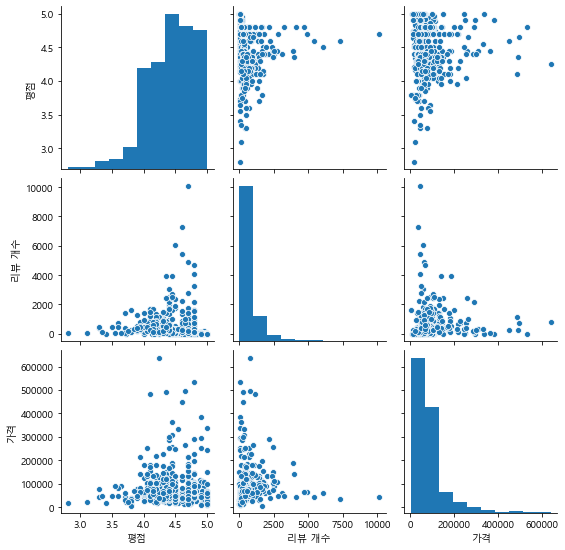

In [237]:
sns.pairplot(searched)

In [283]:
hotels_df.corr()

,평점,리뷰 개수,가격
평점,1.000000,-0.028474,-0.089210
리뷰 개수,-0.028474,1.000000,0.121959
가격,-0.089210,0.121959,1.000000


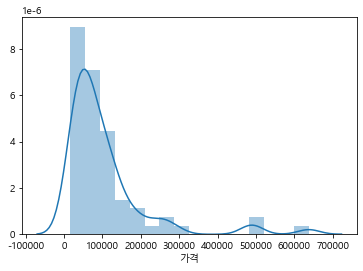

In [276]:
sns.distplot(hotels_df["가격"])

(array([18.,  0.,  0.,  8.,  0.,  0., 18.,  0.,  0., 25.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

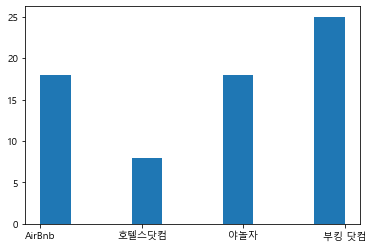

In [282]:
plt.hist(hotels_df["사이트"])